<a href="https://colab.research.google.com/github/tomaszpakula/Data-Science/blob/main/2_Regression_Salary_Base.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Predicting salary using regression models

In this notebook I will try to predict salary based on some features in data, and will try to make other prediction on this data.

For these predictions i am going to use [salary base data](https://www.kaggle.com/datasets/sinhasatwik/salary-base-data)

##1. Preparing and vizualizing data

###Importing libraries

In [ ]:
from matplotlib import pyplot as plt
from matplotlib import colormaps
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
import numpy as np
import scipy as scp
import pandas as pd
cm = plt.get_cmap("Pastel1")
cm2 = plt.get_cmap("Paired")

###Preprocessing data

In [ ]:
df = pd.read_csv("Salary_Data.csv")
df = df.dropna(axis="rows")
df['Education Level'] = df['Education Level'].str.replace('phD', 'PhD', case=False)
df['Education Level'] = df['Education Level'].str.replace("Bachelor's Degree", "Bachelor's", case=False)
df['Education Level'] = df['Education Level'].str.replace("Master's Degree", "Master's", case=False)
df.head(20)

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0
5,29.0,Male,Bachelor's,Marketing Analyst,2.0,55000.0
6,42.0,Female,Master's,Product Manager,12.0,120000.0
7,31.0,Male,Bachelor's,Sales Manager,4.0,80000.0
8,26.0,Female,Bachelor's,Marketing Coordinator,1.0,45000.0
9,38.0,Male,PhD,Senior Scientist,10.0,110000.0


###Example rows in the table

In [ ]:
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


###Basic statistics of numerical data

In [ ]:
df.describe()

,Age,Years of Experience,Salary
count,6698.000000,6698.000000,6698.000000
mean,33.623022,8.095178,115329.253061
std,7.615784,6.060291,52789.792507
min,21.000000,0.000000,350.000000
25%,28.000000,3.000000,70000.000000
50%,32.000000,7.000000,115000.000000
75%,38.000000,12.000000,160000.000000
max,62.000000,34.000000,250000.000000


###Basic plots of features and salary

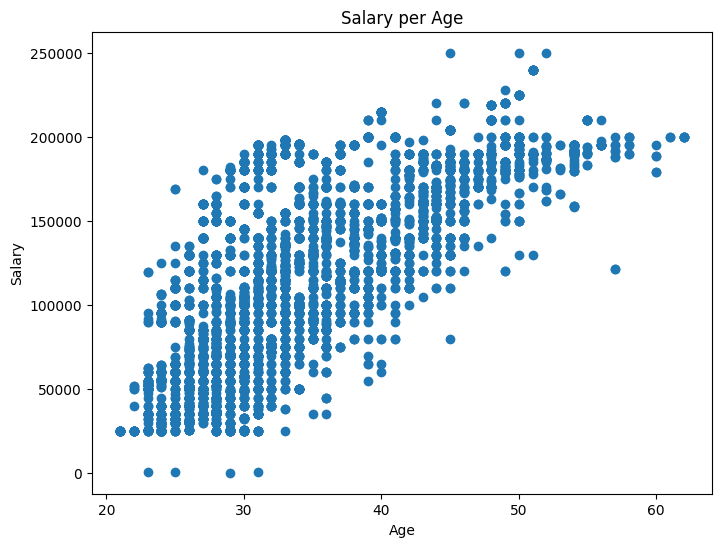

In [ ]:
plt.figure(figsize = (8,6))
plt.scatter(df['Age'], df['Salary'])
plt.title("Salary per Age")
plt.xlabel("Age")
plt.ylabel("Salary")
plt.show()

We can see that there is corellation between age and salary, and we could expect that older people will earn more. Relation between these two variables could be useful for predicting salaries.

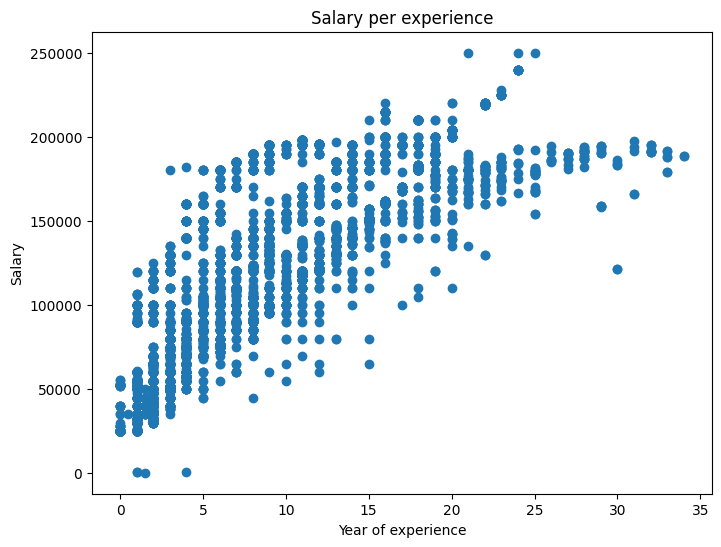

In [ ]:
plt.figure(figsize = (8,6))
plt.scatter(df['Years of Experience'], df['Salary'])
plt.title("Salary per experience")
plt.xlabel("Year of experience")
plt.ylabel("Salary")
plt.show()

Years of experience could be useful too.

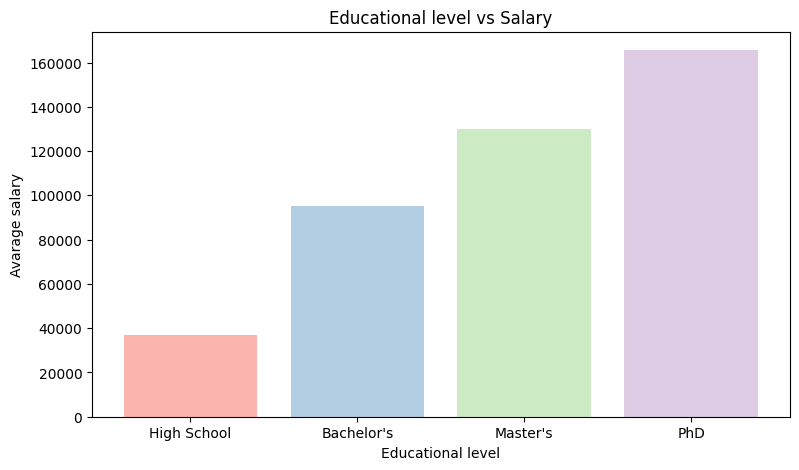

In [ ]:
levels = {"High School":0, "Bachelor's":1,"Master's":2, 'PhD':3}
levels_salary = [[level ,  np.mean(df[df['Education Level']==level]['Salary'])] for level in levels ]
plt.figure(figsize=(9,5))
plt.title("Educational level vs Salary")
plt.bar([ x[0] for x in levels_salary],[x[1] for x in levels_salary], color = [cm(i) for i in range(0,4)])
plt.xlabel("Educational level")
plt.ylabel("Avarage salary")
plt.show()

We can also see that higher avarage salary is for people with higher degree. We can also try to use this feature for regression if we convert eductaion level to numbers.

##2. Linear Regression Models for predicting salaries

Now we know what features can be useful, so we can do some predicting models and compare them. Our models will be train only on training data, and we'll see how it will predict all data, even these, which our model didn't see.

###Predicting salary based on age



In [ ]:
df_train, df_test = train_test_split(df, test_size = 0.33)

In [ ]:
model = LinearRegression()
model.fit(df_train[['Age']], df_train[['Salary']])
y_true = df[['Salary']]
y_predict = model.predict(df[['Age']])
age_mse = mean_squared_error(y_true, y_predict)

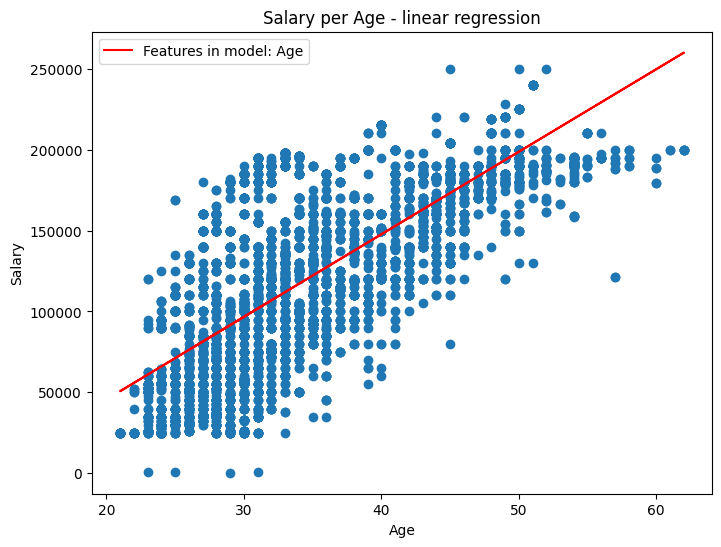

In [ ]:
plt.figure(figsize = (8,6))
plt.scatter(df['Age'], y_true)
plt.plot(df['Age'],y_predict, c="red", label ="Features in model: Age")
plt.title("Salary per Age - linear regression")
plt.xlabel("Age")
plt.ylabel("Salary")
plt.legend()
plt.show()

We predicted salary based on age, and we see that our model is not perfect, but is useful.

###Predicting salary based on years of experience


In [ ]:
model = LinearRegression()
model.fit(df_train[['Years of Experience']], df_train[['Salary']])
y_true = df[['Salary']]
y_predict = model.predict(df[['Years of Experience']])
years_mse = mean_squared_error(y_true, y_predict)
mse_train = mean_squared_error(df_train[['Salary']], model.predict(df_train[['Years of Experience']]))
mse_test = mean_squared_error(df_test[['Salary']], model.predict(df_test[['Years of Experience']]))

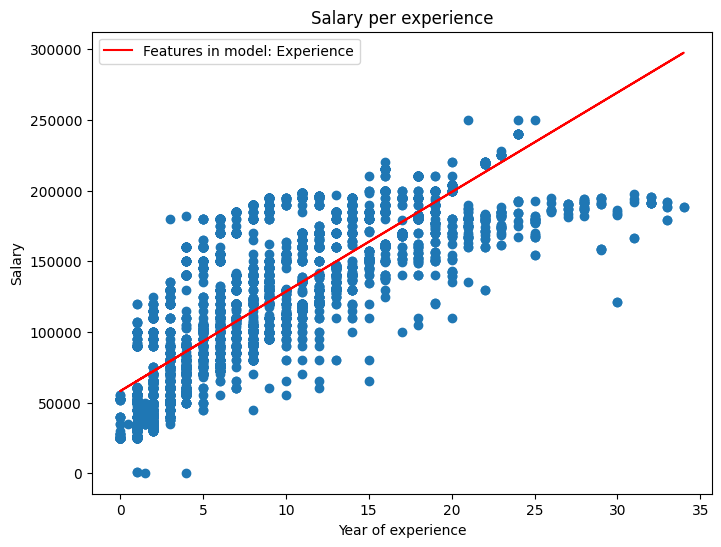

In [ ]:
plt.figure(figsize = (8,6))
plt.scatter(df['Years of Experience'], df['Salary'])
plt.plot(df['Years of Experience'], y_predict, c="r", label = "Features in model: Experience")
plt.title("Salary per experience")
plt.xlabel("Year of experience")
plt.ylabel("Salary")
plt.legend()
plt.show()

It seems like this model make better prediction than previous one, but let's compare mean squared erros.

###Comparing Mean Squared Errors of predictions

In [ ]:
print(f"AGE MSE: {age_mse}\nYears of Experience MSE {years_mse}")

AGE MSE: 1309603445.8358037
Years of Experience MSE 962935014.3864899


And we see, that second model is better. But we could try to make another model.

###Predicting salary based on Educational level


In [ ]:
model = LinearRegression()
model.fit(np.array([levels[level] for level in df_train['Education Level']]).reshape(-1,1), df_train['Salary'])
y_predict = model.predict(np.array([level for level in levels.values()]).reshape(-1,1))

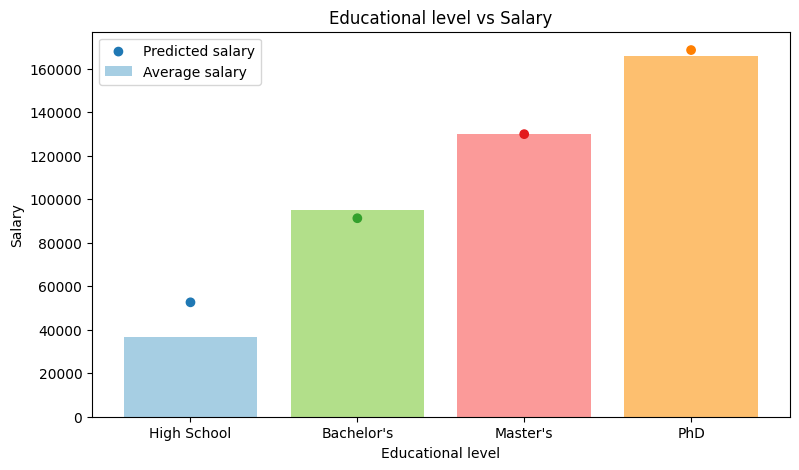

In [ ]:
plt.figure(figsize=(9,5))
plt.title("Educational level vs Salary")
plt.bar([ x[0] for x in levels_salary],[x[1] for x in levels_salary], color = [cm2(i) for i in [0,2,4,6]], label = "Average salary")
plt.scatter([level for level in levels], y_predict, color = [cm2(i) for i in [1,3,5,7]], label = "Predicted salary")
plt.xlabel("Educational level")
plt.ylabel("Salary")
plt.legend()
plt.show()

As we can see on the plot, model predict values closed to avarage, but it can be not good if our data are more dispersed.

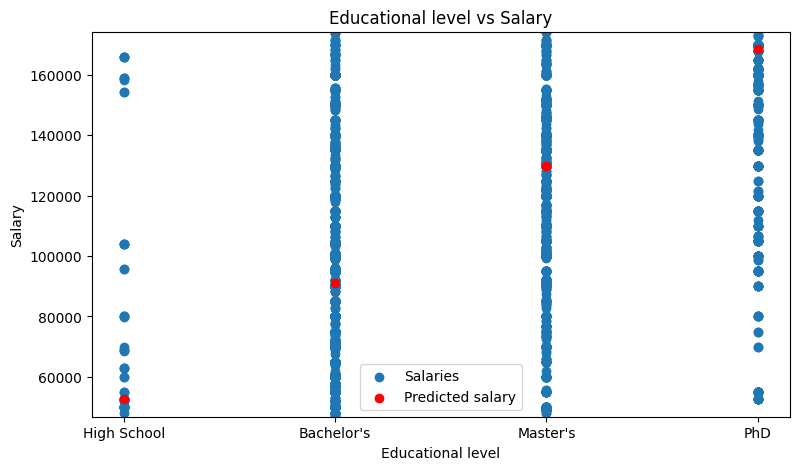

In [ ]:
plt.figure(figsize=(9,5))
plt.title("Educational level vs Salary")
plt.scatter([levels[level] for level in df['Education Level']],df['Salary'], label = "Salaries")
plt.scatter([level for level in levels], y_predict, color = "red", label = "Predicted salary")
plt.xlabel("Educational level")
plt.ylabel("Salary")
plt.legend()
plt.show()

We see that this model is not useful enough, but let's compare MSE of all our models.

###Comparing all MSE

In [ ]:
y_predict = model.predict(np.array([levels[level] for level in df['Education Level']]).reshape(-1,1))
level_mse = mean_squared_error(df['Salary'], y_predict)

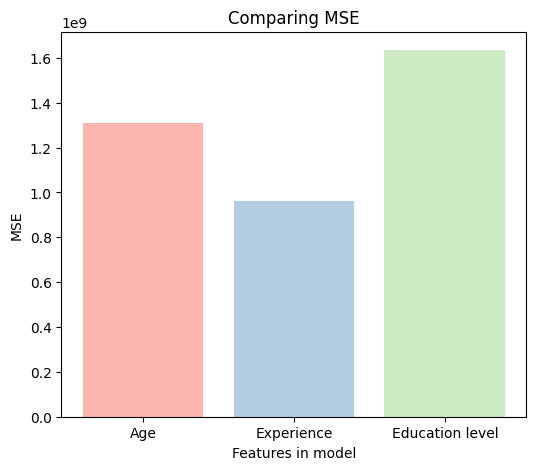

In [ ]:
plt.figure(figsize=(6,5))
plt.title("Comparing MSE")
plt.bar(['Age', 'Experience','Education level'],[age_mse, years_mse, level_mse], color = [cm(0),cm(1),cm(2)])
plt.xlabel("Features in model")
plt.ylabel("MSE")
plt.show()

Years of experience are more useful data for us, but we can get lower MSE if we use this feature for polynomial regression. But now we can compare how the MSE of Years of Experience for train data differs from test data.

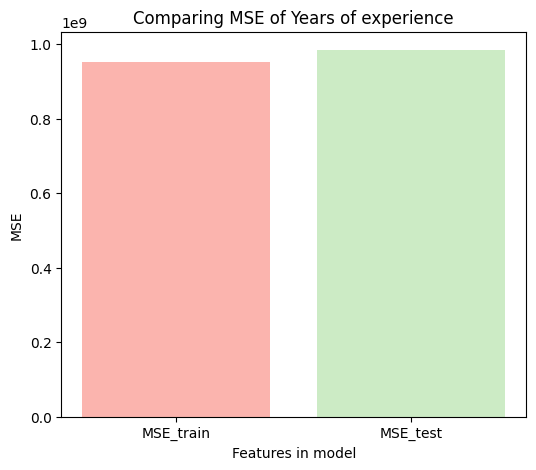

In [ ]:
plt.figure(figsize=(6,5))
plt.title("Comparing MSE of Years of experience")
plt.bar(['MSE_train', 'MSE_test'],[mse_train, mse_test], color = [cm(0),cm(2)])
plt.xlabel("Features in model")
plt.ylabel("MSE")
plt.show()

It's interesting beacuse this values don't differ too much, so our data probably won't overfit if we use too high polynomial degree.

##3. Polynomial Regression Model for predicting salaries

###Comparing models with different degree of polynomial

In [ ]:
def f(x,coef):
  result = 0
  for i in range(len(coef)):
    result+=coef[i]*(x**i)
  return result

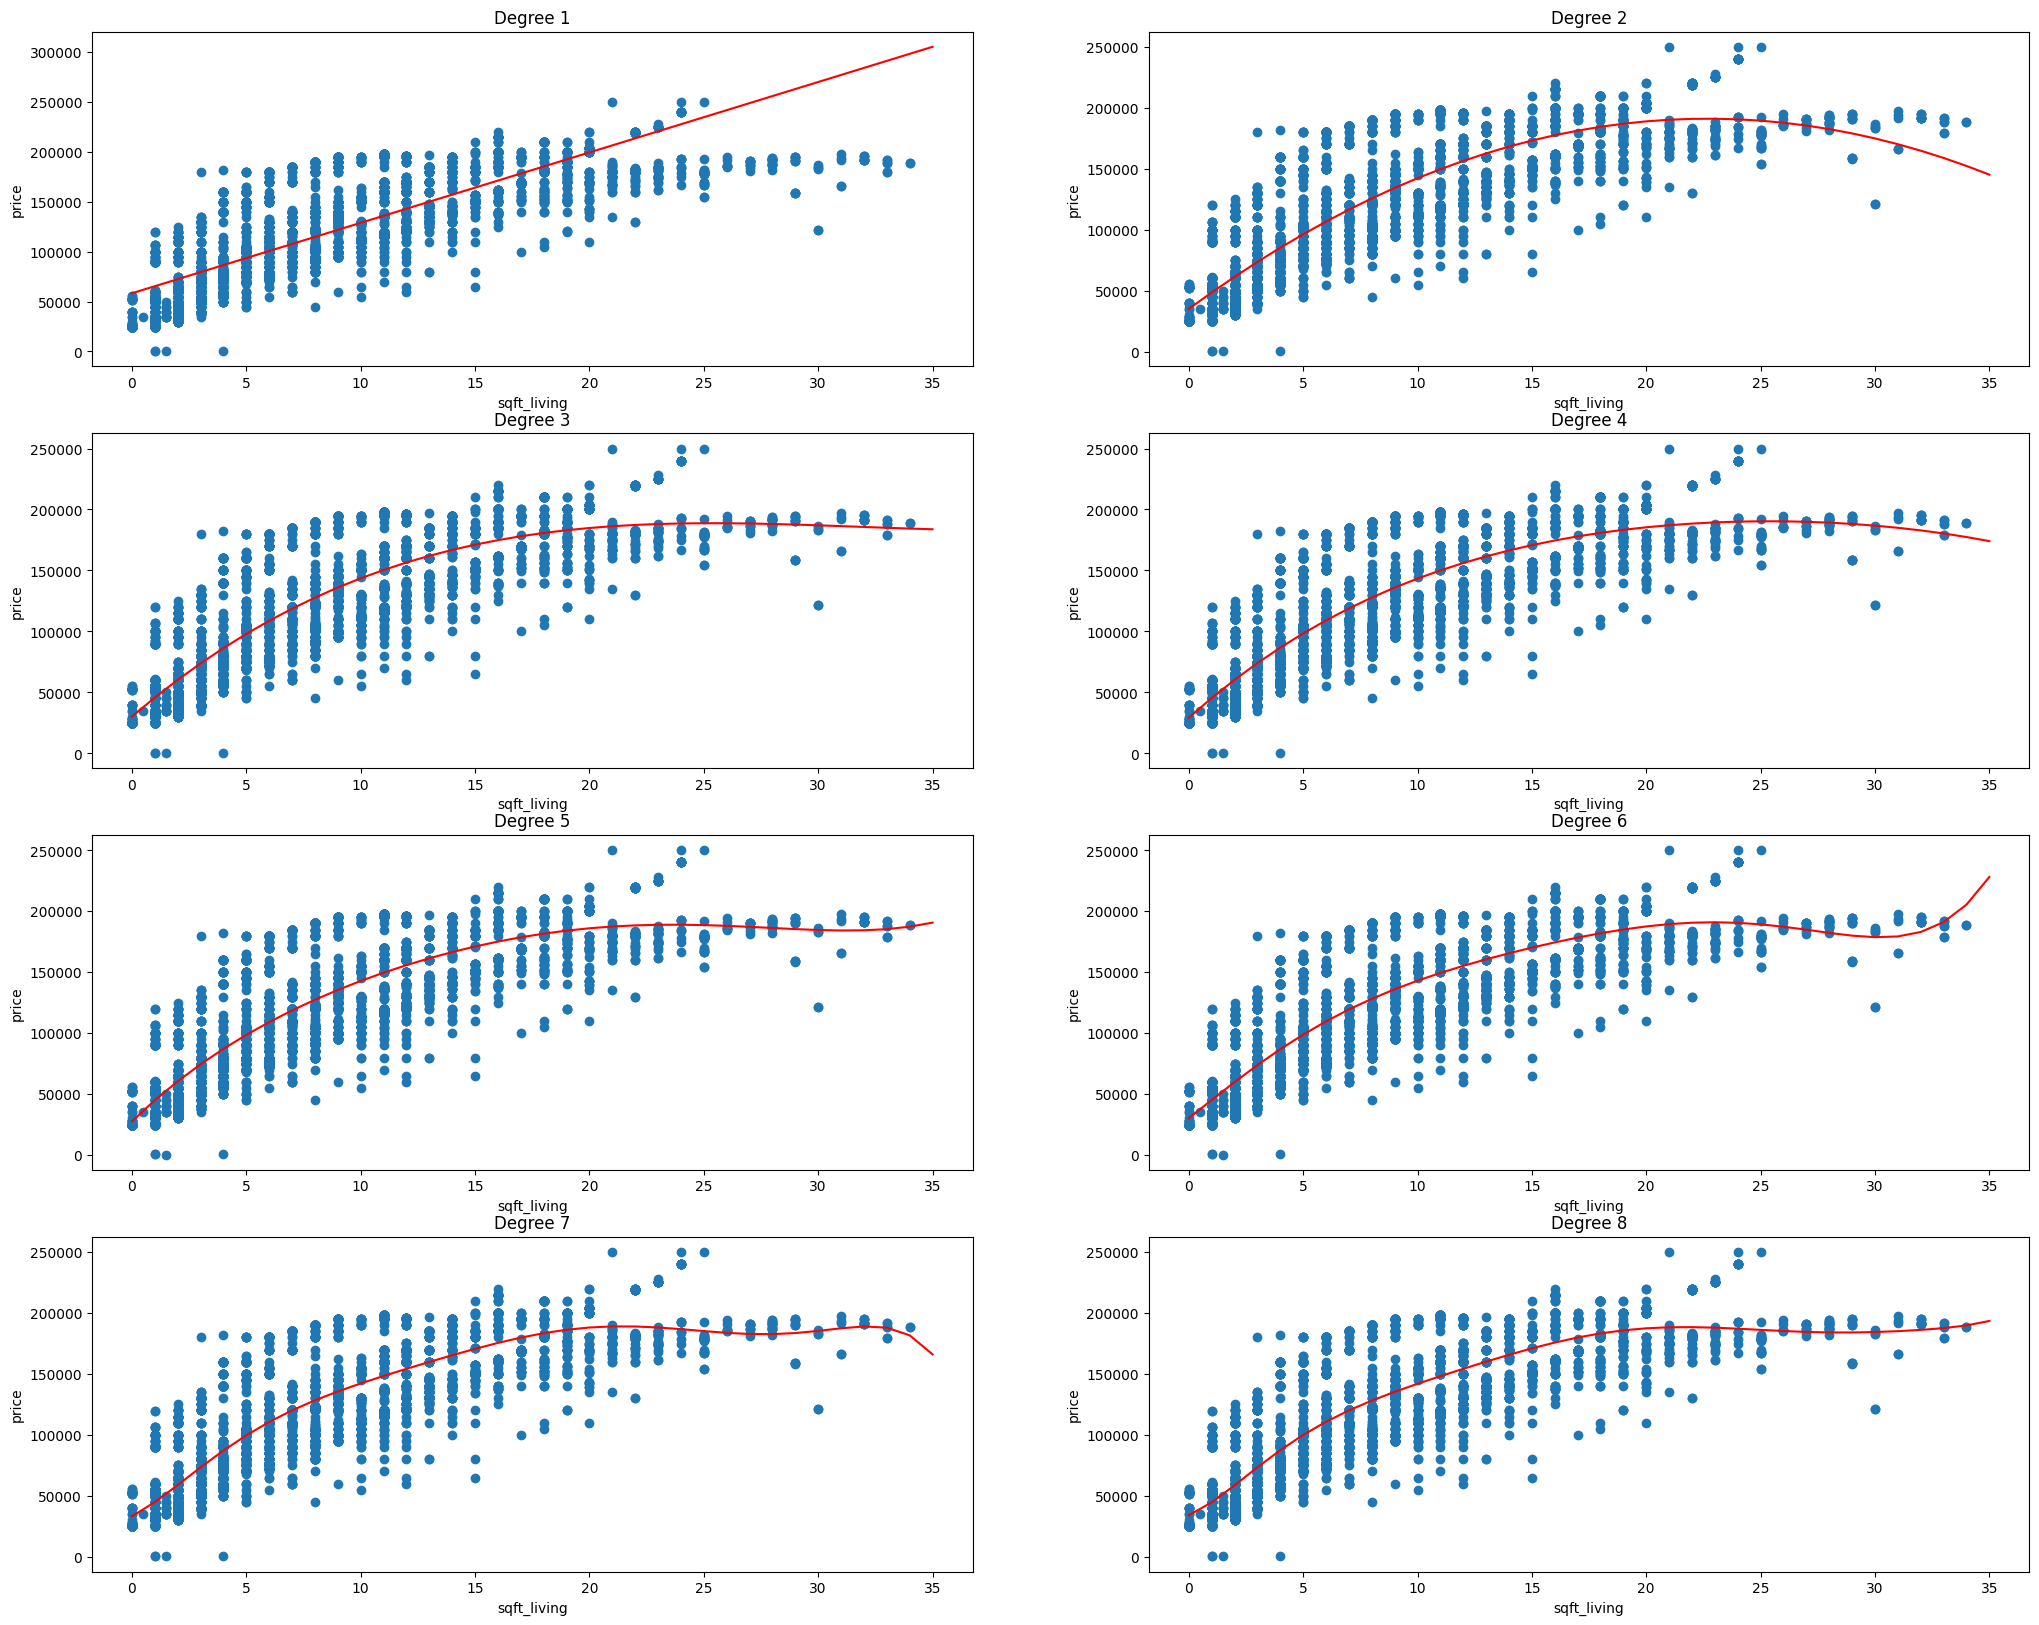

In [ ]:
fig, axs = plt.subplots(4, 2)
fig.set_figheight(20)
fig.set_figwidth(25)
scores=[]

X = df['Years of Experience'].values.reshape(-1,1)
y = df['Salary'].values.reshape(-1)

i,j=0,0
for order in range(1,9):
  poly = PolynomialFeatures(order, include_bias = False)
  X_order = poly.fit_transform(X)
  model = LinearRegression()
  model.fit(X_order, y)

  scores.append(mean_squared_error(model.predict(X_order),y))

  coef = list(model.coef_)
  coef=coef[::-1]
  coef.append(model.intercept_)
  coef=coef[::-1]
  args=np.linspace(0,35, 36)

  axs[i,j].set_title(f"Degree {order}")
  axs[i,j].set_xlabel("sqft_living")
  axs[i,j].set_ylabel("price")
  axs[i,j].plot(args,[f(x,coef) for x in args],color="red")
  axs[i,j].scatter(X,y)
  if(j==1):
    j=0
    i+=1
  else:
    j+=1

fig.show()

It is better to use polynomials with higher degree than one, but not too high, beacuse we could overfit our data to training ones.

###Comparing mean squared errors of polynomials

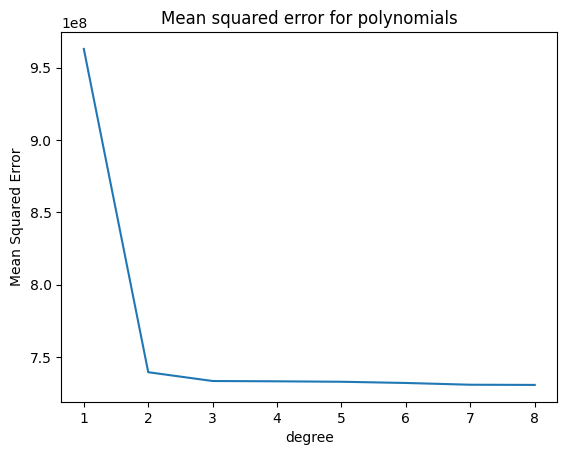

In [ ]:
plt.plot([i for i in range(1,9)], scores)
plt.title("Mean squared error for polynomials")
plt.xlabel("degree")
plt.ylabel("Mean Squared Error")
plt.show()

We see how much the mse is changing when we change degree from 1 to 2.

###Comparing MSE of test error and training error

In [ ]:
scores_train=[]
scores_test=[]

for order in range(1,12):
    poly = PolynomialFeatures(order, include_bias = False)
    X_order = poly.fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X_order, y, test_size=0.3, random_state=45)
    model = LinearRegression()
    model.fit(X_train, y_train)

    scores_train.append(mean_squared_error(model.predict(X_train),y_train))
    scores_test.append(mean_squared_error(model.predict(X_test),y_test))

    coef = list(model.coef_)
    coef=coef[::-1]
    coef.append(model.intercept_)
    coef=coef[::-1]
    args=np.linspace(0,6000,6000)


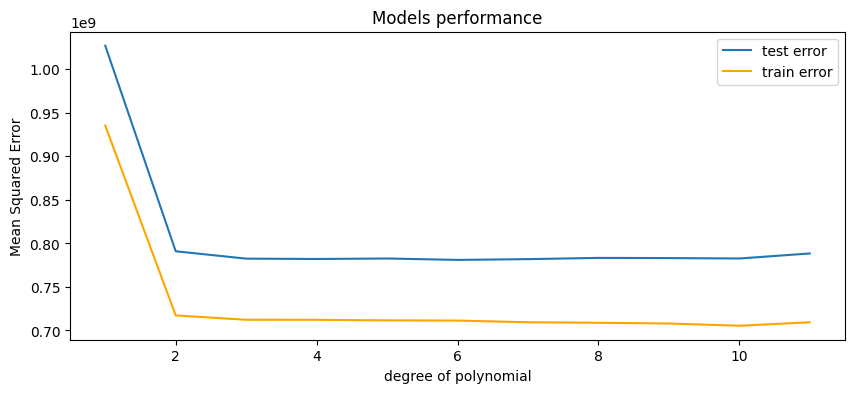

In [ ]:
plt.figure(figsize=(10,4))
plt.title("Models performance")
plt.plot([i for i in range(1,12)],scores_test, label="test error")
plt.plot([i for i in range(1,12)],scores_train, label="train error", color="orange")
plt.xlabel("degree of polynomial")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.show()

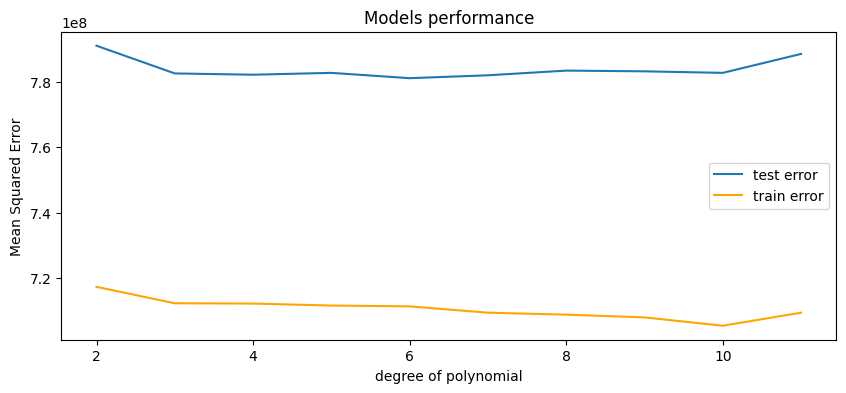

In [ ]:
plt.figure(figsize=(10,4))
plt.title("Models performance")
plt.plot([i for i in range(2,12)],scores_test[1:], label="test error")
plt.plot([i for i in range(2,12)],scores_train[1:], label="train error", color="orange")
plt.xlabel("degree of polynomial")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.show()

From the plot we can read that the best degree to take for polynomial in our case is 10. But we have to remember that our test data are closed to training data, so we should choose degree lower like 3 to our future data could give us more reliable results.

##4. Using more features for model

###Salary based on age and years of experience

We could also use for our model more features, and check is our model better than previous ones.

In [ ]:
model = LinearRegression()
model.fit(df_train[['Age','Years of Experience']], df_train[['Salary']])
y_true = df[['Salary']]
y_predict = model.predict(df[['Age','Years of Experience']])
mse = mean_squared_error(y_true, y_predict)

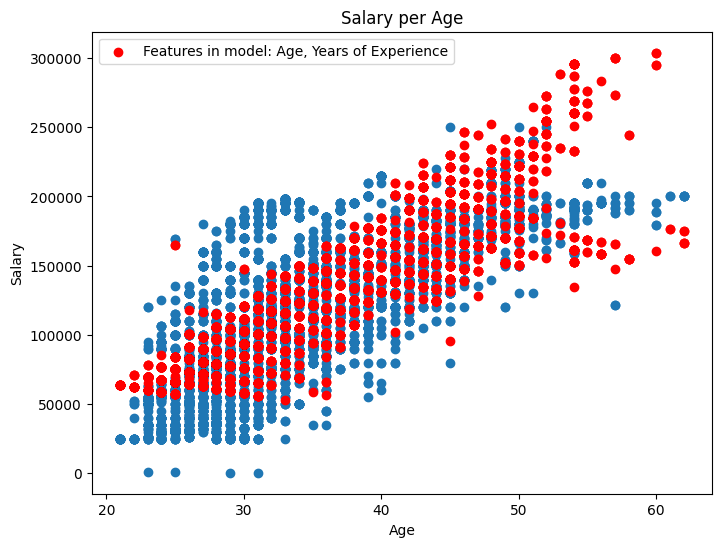

In [ ]:
plt.figure(figsize = (8,6))
plt.scatter(df['Age'], y_true)
plt.scatter(df['Age'],y_predict, c="red", label = "Features in model: Age, Years of Experience")
plt.title("Salary per Age")
plt.xlabel("Age")
plt.ylabel("Salary")
plt.legend()
plt.show()

Now we see that our model can predict not only one salary for exact age, but value also depends on years of experience.

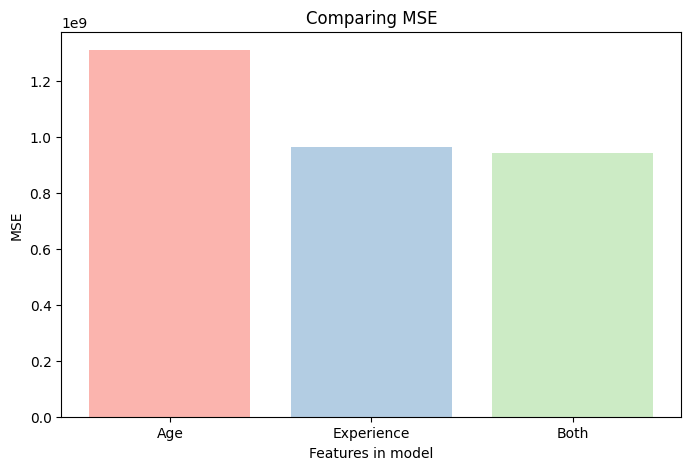

In [ ]:
cm = plt.get_cmap("Pastel1")
plt.figure(figsize=(8,5))
plt.title("Comparing MSE")
plt.bar(['Age', 'Experience','Both'],[age_mse, years_mse, mse], color=[cm(m) for m in [0,1,2]])
plt.xlabel("Features in model")
plt.ylabel("MSE")
plt.show()

New model is a little beter than linear model for experience, but it doesn't make bigger difference.

##5. Predicting other feature

Last thing we are going to do is predicting age based on salary using simple linear regression model, so we could see that salary is not only thing we can predict using our data.

In [ ]:
model = LinearRegression()
X_training, X_test = df_train['Salary'].values.reshape(-1,1), df_test['Salary'].values.reshape(-1,1)
y_training, y_test = df_train['Age'].values.reshape(-1), df_test['Age'].values.reshape(-1)
model.fit(X_training, y_training)
y_predict = model.predict(X_test)



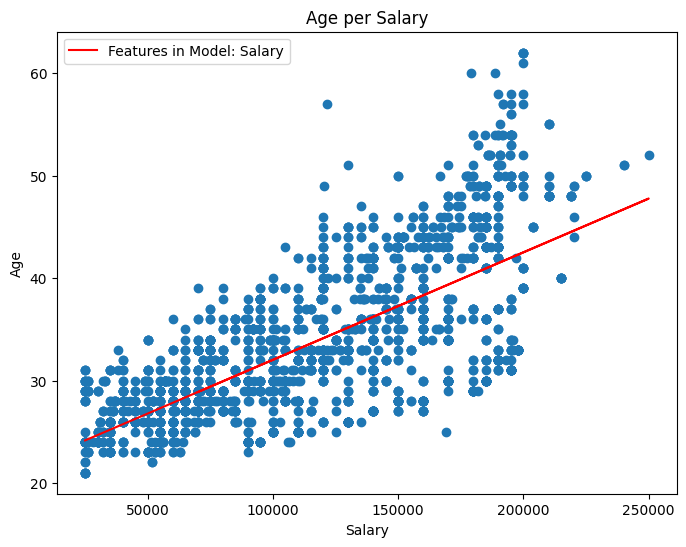

In [ ]:
plt.figure(figsize = (8,6))
plt.scatter(X_test, y_test)
plt.plot(X_test, y_predict, color = "red", label = "Features in Model: Salary")
plt.title("Age per Salary")
plt.xlabel("Salary")
plt.ylabel("Age")
plt.legend()
plt.show()

Finally we can see mean squared error.

In [ ]:
mean_squared_error(y_test, y_predict)

27.276842847610503

##6. Resume

We saw that we could use our data to predict salaries for future data based on years of experience or predict age when we know salaries of person.